#Question 1: XOR Gate Classification

XOR dataset

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

x = np.array([[0,0],[0,1],[1,0],[1,1]]) #XOR Inputs
y = np.array([0,1,1,0]) #XOR Outputs


**single layer Perceptron using MCP Neuron**

In [53]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(x,y)


Perceptron()

predict and evaluate

In [54]:
prediction = perceptron.predict(x)
print("Perceptron prediction: ", prediction)
print("Actual Outputs: ", y)


Perceptron prediction:  [0 0 0 0]
Actual Outputs:  [0 1 1 0]


Performance observence

In [55]:
accuracy = np.mean(prediction == y)
print("Accuracy: ", accuracy*100)

Accuracy:  50.0


**Multi-Layer Perceptron (MLP) to solve XOR**

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(2, input_dim=2, activation='relu'))  # 2 neurons in the hidden layer
mlp.add(Dense(1, activation='sigmoid'))  # 1 output neuron

mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

mlp.fit(x, y, epochs=100, verbose=0)

Evaluating the model

In [57]:
loss, accuracy = mlp.evaluate(x, y)
predictions_mlp = (mlp.predict(x) > 0.5).astype("int32")
print("MLP Predictions:", predictions_mlp.flatten())
print("MLP Accuracy", accuracy*100)

1/1 [==============================] - 0s 51ms/step
MLP Predictions: [1 1 0 0]
MLP Accuracy 50.0


Method to help for visualisation

In [58]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Get model predictions for the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    if hasattr(Z, 'reshape'):
        Z = Z.reshape(xx.shape)
    else:
        Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Input A')
    plt.ylabel('Input B')
    plt.show()

Plotting for perceptron

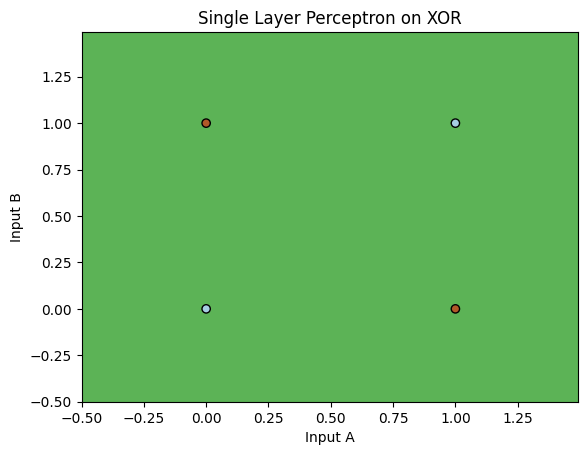

In [59]:
plot_decision_boundary(x, y, perceptron, "Single Layer Perceptron on XOR")

plotting for  MLP

1250/1250 [==============================] - 1s 1ms/step


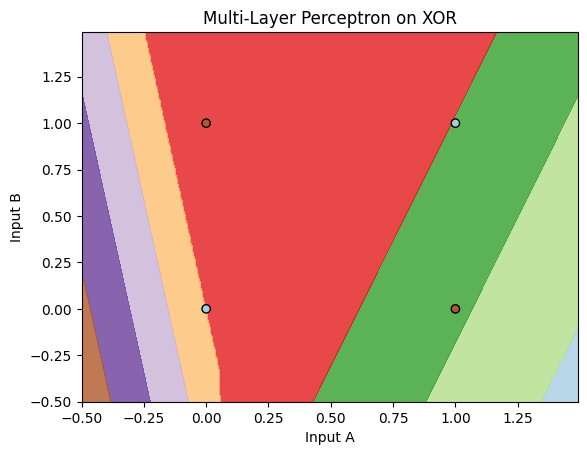

In [60]:
plot_decision_boundary(x, y, mlp, "Multi-Layer Perceptron on XOR")



---
---
---

#Question 2: A. Sentiment Analysis Twitter Airline


*Architecture*
*   **Input Layer**: Receives the vectorized input.
*   **Hidden Layer**: Applies different activation functions.
*   **Output Layer**: Outputs a probability between 0 and 1, suitable for binary classification.



Loadinig Dataset

In [61]:
import pandas as pd

data = pd.read_csv('Tweets.csv')

data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Data Preprocessing**
The dataset is preprocessed by converting the text into numerical form using CountVectorizer, and labels are transformed into binary form (0 for negative, 1 for positive).

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=input_size)
X = vectorizer.fit_transform(data['text']).toarray()

y = (data['airline_sentiment'] == 'positive').astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


Building the neural network model with sigmoid activation function for hidden layers

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

class SentimentNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_func):
        super(SentimentNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation_func = activation_func
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation_func(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

activations = {
    'sigmoid': nn.Sigmoid(),
    'relu': nn.ReLU(),
    'tanh': nn.Tanh()
}

input_size = 1000
hidden_size = 128
output_size = 1
S_model = SentimentNet(input_size, hidden_size, output_size, activations['sigmoid'])
R_model = SentimentNet(input_size, hidden_size, output_size, activations['relu'])
T_model = SentimentNet(input_size, hidden_size, output_size, activations['tanh'])

S_optimizer = optim.Adam(S_model.parameters(), lr=0.001)
R_optimizer = optim.Adam(R_model.parameters(), lr=0.001)
T_optimizer = optim.Adam(T_model.parameters(), lr=0.001)



**Activation Functions**


**Sigmoid Activation**: Often used for binary classification but can suffer from vanishing gradients.

**ReLU Activation**: Helps avoid vanishing gradients but may lead to "dead neurons."

**Tanh Activation**: Similar to sigmoid but output ranges from -1 to 1, potentially making optimization easier.



1.   Sigmoid Activation
*   Maps the input to a range between 0 and 1.
*   Often used for binary classification, but can suffer from vanishing gradient issues.
*   Formula is: 1/(1+e^(-x))


2.   Tanh Activation
*   Introduces sparsity, meaning only some neurons activate, making learning faster.
*   Solves vanishing gradient problems but can suffer from dead neurons where gradients are zero for large negative inputs.
*   formula is: max(0,x)


3.   Relu Activation
*   Maps inputs to the range -1 to 1.
*   Unlike Sigmoid, Tanh is centered around 0, making optimization easier. Still, it can suffer from vanishing gradient issues like Sigmoid.
*   formula is: (e^x)-(e^-x)/((e^x)+(e^-x))


Training Function

In [65]:
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

def train_model(model, optimizer, criterion, epochs=100):
    model.train()
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

    return losses


training and comparing the models

In [66]:
print("Training model with Sigmoid activation...")
sigmoid_losses = train_model(S_model, S_optimizer, criterion)

print("\nTraining model with ReLU activation...")
relu_losses = train_model(R_model, R_optimizer, criterion)

print("\nTraining model with Tanh activation...")
tanh_losses = train_model(T_model, T_optimizer, criterion)


Training model with Sigmoid activation...
Epoch [1/100], Loss: 0.3783
Epoch [2/100], Loss: 0.2543
Epoch [3/100], Loss: 0.2139
Epoch [4/100], Loss: 0.1994
Epoch [5/100], Loss: 0.1903
Epoch [6/100], Loss: 0.1853
Epoch [7/100], Loss: 0.1815
Epoch [8/100], Loss: 0.1790
Epoch [9/100], Loss: 0.1764
Epoch [10/100], Loss: 0.1750
Epoch [11/100], Loss: 0.1737
Epoch [12/100], Loss: 0.1733
Epoch [13/100], Loss: 0.1718
Epoch [14/100], Loss: 0.1714
Epoch [15/100], Loss: 0.1714
Epoch [16/100], Loss: 0.1705
Epoch [17/100], Loss: 0.1697
Epoch [18/100], Loss: 0.1696
Epoch [19/100], Loss: 0.1689
Epoch [20/100], Loss: 0.1694
Epoch [21/100], Loss: 0.1688
Epoch [22/100], Loss: 0.1690
Epoch [23/100], Loss: 0.1686
Epoch [24/100], Loss: 0.1680
Epoch [25/100], Loss: 0.1676
Epoch [26/100], Loss: 0.1674
Epoch [27/100], Loss: 0.1670
Epoch [28/100], Loss: 0.1669
Epoch [29/100], Loss: 0.1667
Epoch [30/100], Loss: 0.1665
Epoch [31/100], Loss: 0.1664
Epoch [32/100], Loss: 0.1663
Epoch [33/100], Loss: 0.1661
Epoch [34/

Plotting the losses

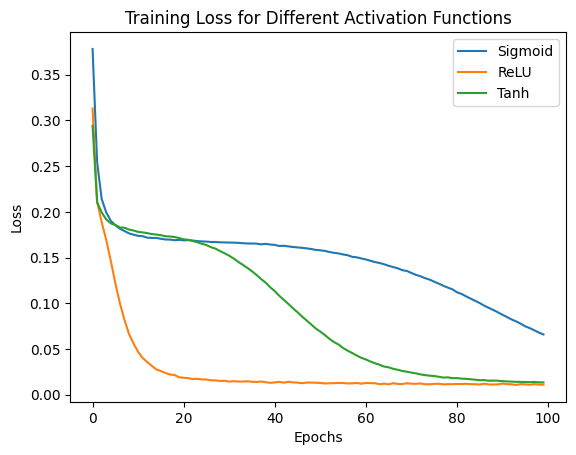

In [67]:
import matplotlib.pyplot as plt

plt.plot(sigmoid_losses, label='Sigmoid')
plt.plot(relu_losses, label='ReLU')
plt.plot(tanh_losses, label='Tanh')
plt.title('Training Loss for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


*   The ReLU function achieves the lowest training loss among the three activations.
*   Tanh initially performs similarly to ReLU, but after about 20 epochs, its convergence slows down.
*   Sigmoid has the slowest convergence and the highest final training loss.


*   ReLU is the best activation function for this scenario, offering faster convergence and lower training loss.
*   Tanh is also a good choice but slightly less efficient.
*   Sigmoid performs poorly in comparison, suffering from slower convergence and higher training loss due to issues like vanishing gradients.

Model Evaluation on Test Set

In [70]:
def evaluate_model(model, X_test_tensor, y_test_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs >= 0.5).float()
        accuracy = (predictions == y_test_tensor).float().mean().item()
    return accuracy

sigmoid_acc = evaluate_model(S_model, X_test_tensor, y_test_tensor)
relu_acc = evaluate_model(R_model, X_test_tensor, y_test_tensor)
tanh_acc = evaluate_model(T_model, X_test_tensor, y_test_tensor)

print(f"ReLU Accuracy: {relu_acc*100:.2f}%")
print(f"Sigmoid Accuracy: {sigmoid_acc*100:.2f}%")
print(f"Tanh Accuracy: {tanh_acc*100:.2f}%")


ReLU Accuracy: 89.14%
Sigmoid Accuracy: 89.52%
Tanh Accuracy: 88.97%


Despite the differences in training loss curves, the final accuracies of the models are quite similar:

*   Sigmoid Accuracy: 89.52%
*   ReLU Accuracy: 89.14%
*   Tanh Accuracy: 88.97%